In [2]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype


In [4]:
# SUBGRAPH_API_URL = "http://192.168.1.64:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-no-optimized-his"
SUBGRAPH_API_URL = "http://localhost:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-no-op-his-test"

sg = Subgrounds()

zero_ex = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())

TIMESTAMP_NAME = "timestamp"
ALL_ENTRIES = 100000000

2024-01-09


In [5]:
def plot_time_series_df(df, title): 
    for k in df.keys():
        if(k != TIMESTAMP_NAME) and is_numeric_dtype(df[k]):
            df.plot(x=TIMESTAMP_NAME, y=k, legend=False)
            plt.title(title + ": " + k.split("_")[-1])

    plt.show()  

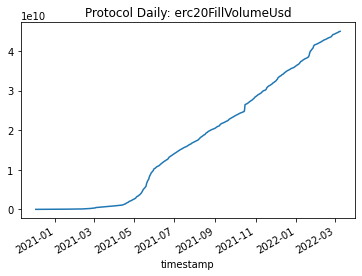

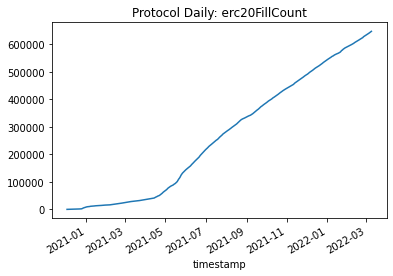

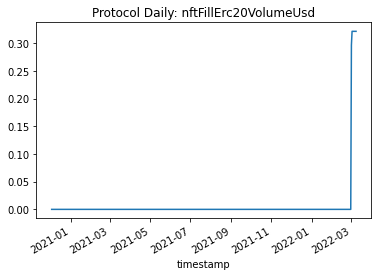

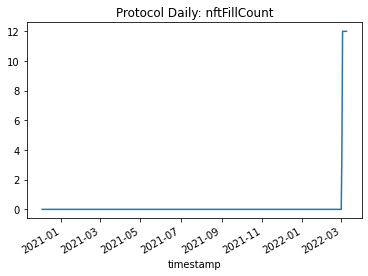

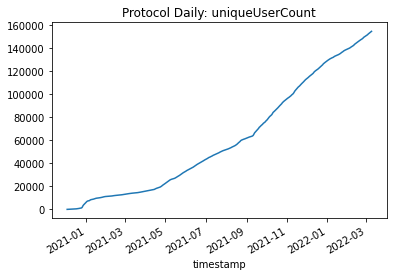

In [9]:
protocol_daily = zero_ex.Query.protocol(id="0x00").dailyDataSnapshots(orderBy=zero_ex.DailyProtocolData.timestamp, orderDirection="desc", first=ALL_ENTRIES)

df = sg.query_df([protocol_daily.timestamp, protocol_daily.data])
df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
df

plot_time_series_df(df, "Protocol Daily")

,id,type
0,0x4272696467654f72646572,BridgeOrder
1,0x4c696d69744f72646572,LimitOrder
2,0x4f74634f72646572,OtcOrder
3,0x506c756761626c654c697175696469747950726f7669...,PlugableLiquidityProvider
4,0x5266714f72646572,RfqOrder


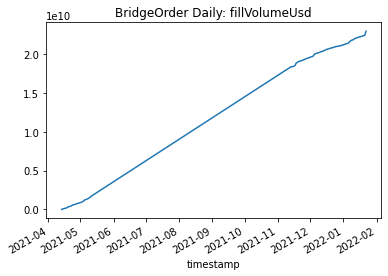

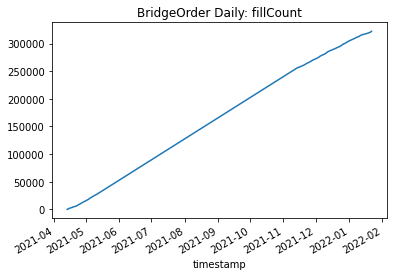

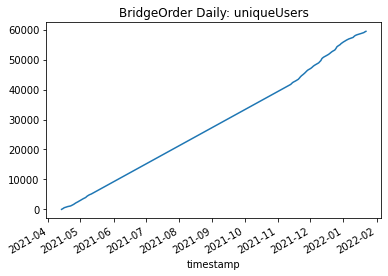

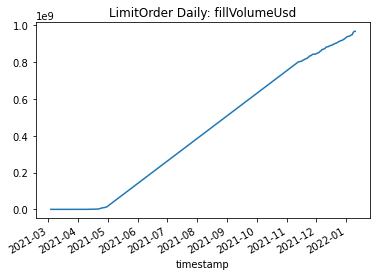

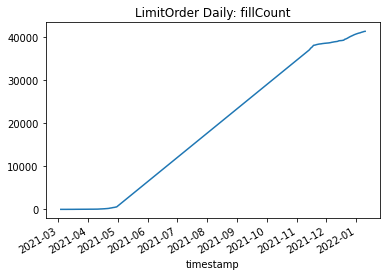

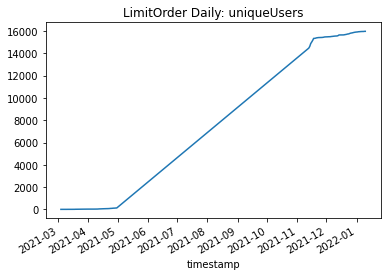

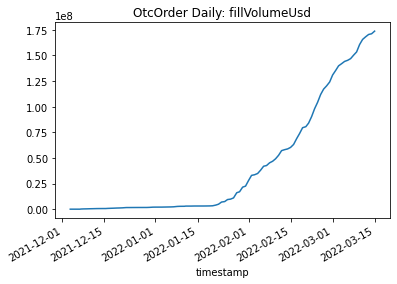

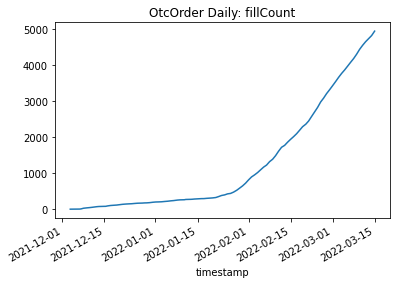

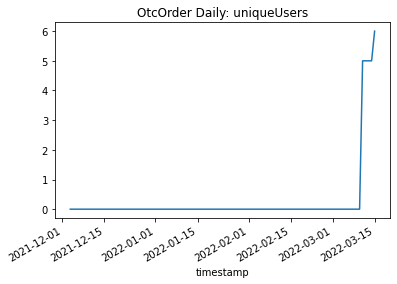

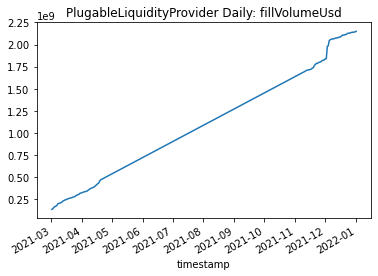

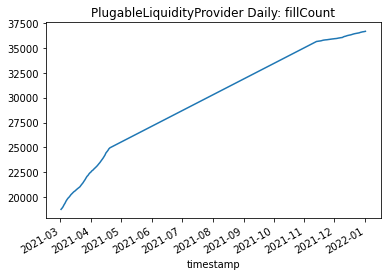

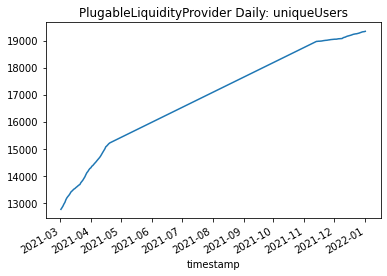

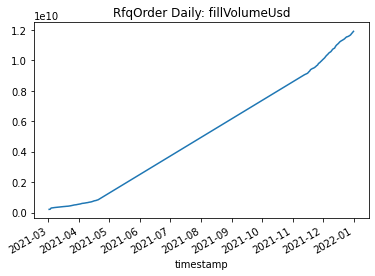

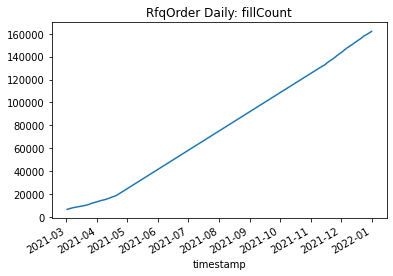

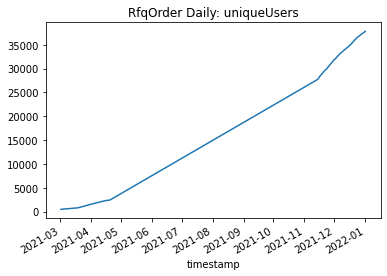

In [45]:
fill_type_summaries = zero_ex.Query.erc20FillTypeSummaries

df = sg.query_df([fill_type_summaries.id, fill_type_summaries.type], columns=["id", "type"])
display(df)

# for a in df.itertuples():
#     print(a.)

for row in df.itertuples():
    summary = zero_ex.Query.erc20FillTypeSummary(id=row.id)
    daily_snapshots_df = sg.query_df([summary.dailyDataSnapshots.timestamp, summary.dailyDataSnapshots.data])
    daily_snapshots_df.rename(columns={ daily_snapshots_df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    daily_snapshots_df[TIMESTAMP_NAME] = pd.to_datetime(daily_snapshots_df[TIMESTAMP_NAME], unit="s")
    # display(daily_snapshots_df)
    plot_time_series_df(daily_snapshots_df, f"{row.type} Daily")


In [46]:
# tokens = zero_ex.Query.erc20Tokens(first=ALL_ENTRIES, where=[zero_ex.Erc20Token.data.erc20FillInputVolume > 0])

# tokens_df = sg.query_df([tokens.id, tokens.data.erc20FillInputVolume])
# display(tokens_df)

# erc20_token_daily = zero_ex.Query.erc20Tokens.dailyDataSnapshots(orderBy=zero_ex.DailyProtocolData.timestamp, orderDirection="desc", first=6000)

# df = sg.query_df([protocol_daily.timestamp, protocol_daily.data])
# df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
# df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
# df

# plot_time_series_df(df, "Protocol Daily")